#### 单层神经网络回顾

Chapter2中的自适应线性神经元Adaline结构如下：

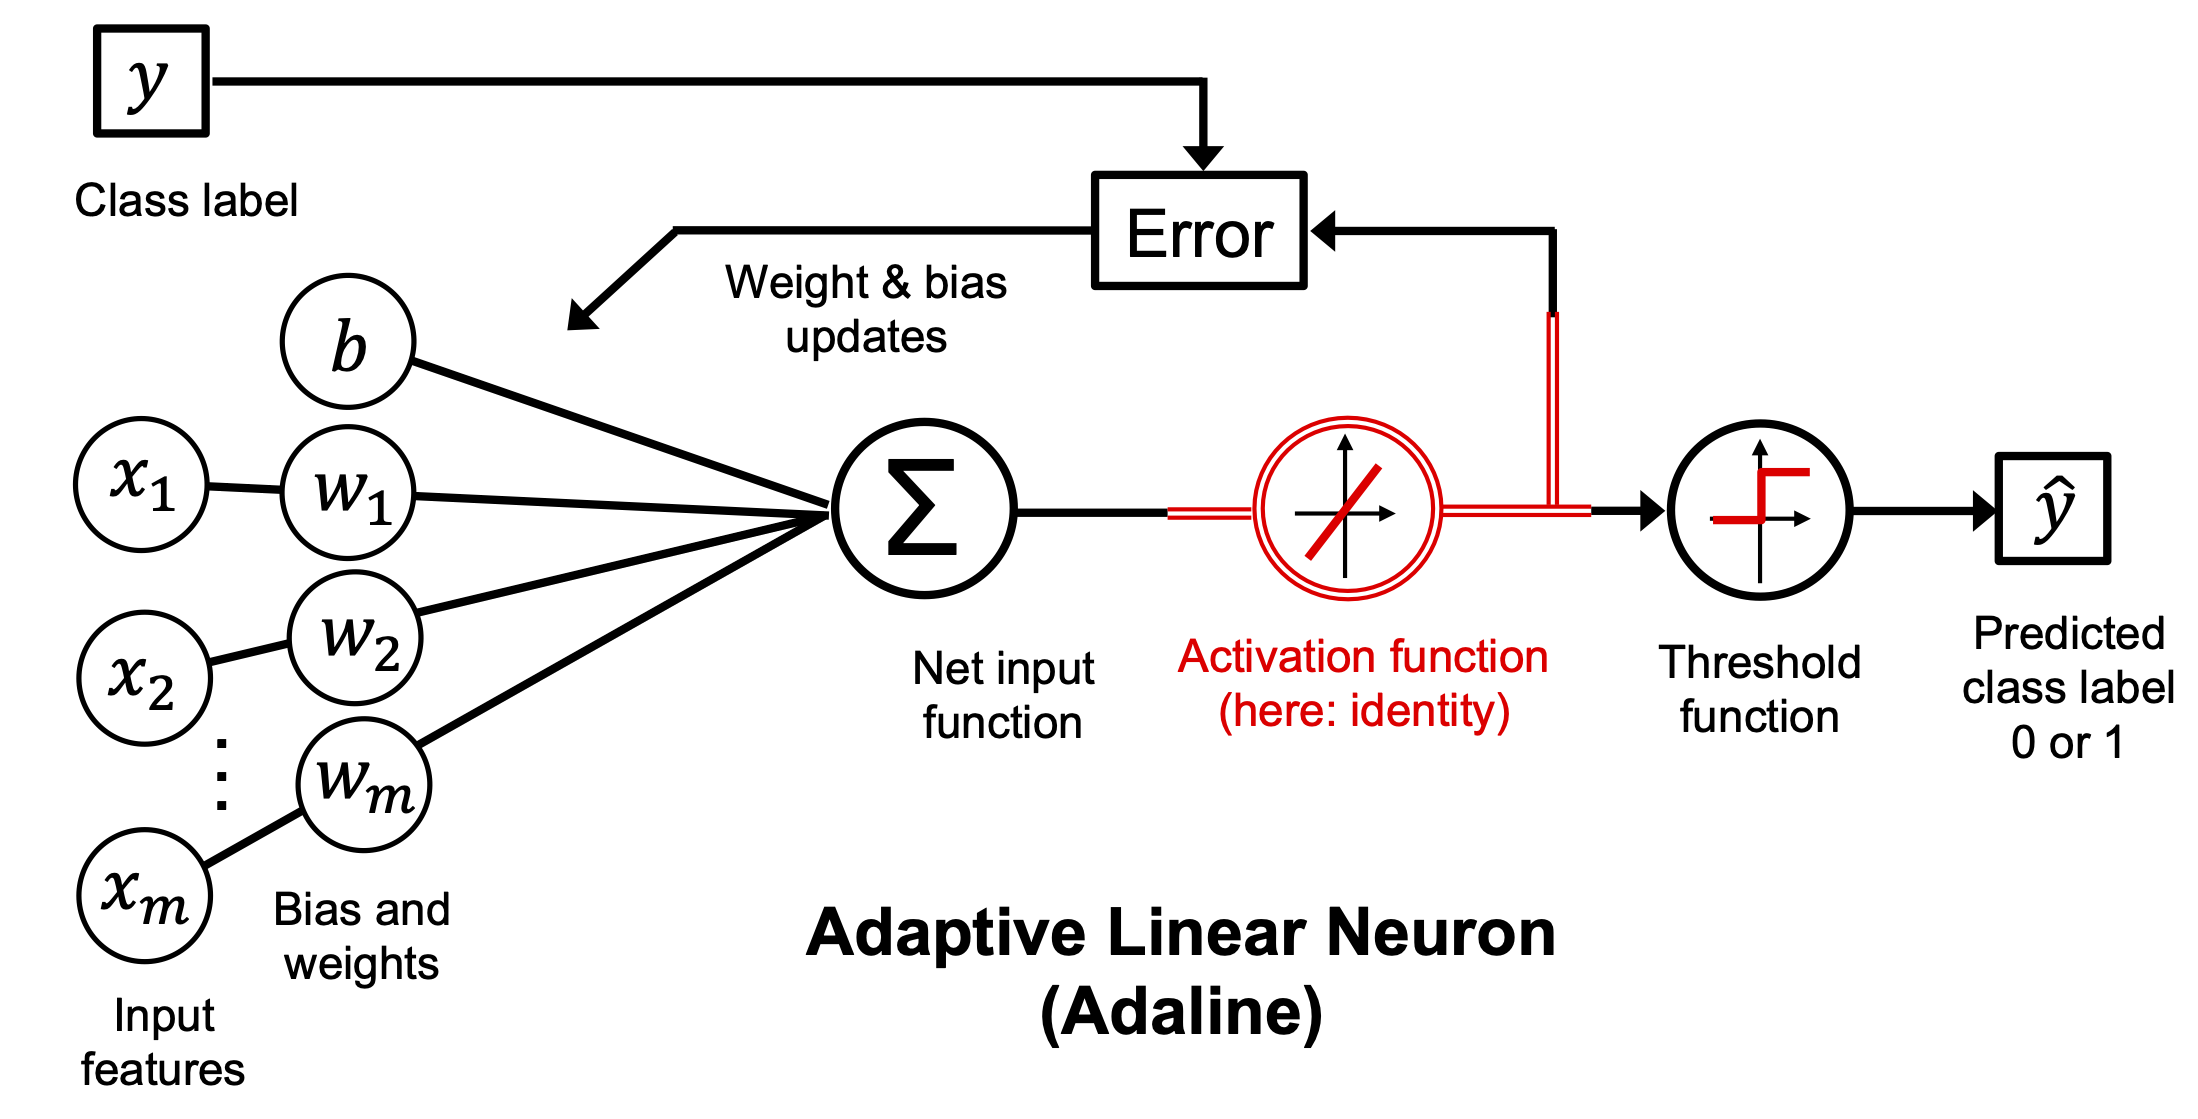

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter11/figures/11_01.png', 
      width=450)

当利用梯度下降算法来学习模型的权重系数时，使用如下规则更新权重向量和偏置单元：

$$\boldsymbol w:=\boldsymbol w+\Delta \boldsymbol w,\quad b:=b+\Delta b$$

其中，$$\Delta w_{j}=-\eta\frac{\partial L}{\partial w_{j}}\\
\Delta b=-\eta\frac{\partial L}{\partial b}$$也就是说，使用整个训练数据集来计算梯度，并通过损失函数梯度的负方向来更新权重.

同时，为了找到模型的最佳权重，需要定义一个目标函数，通常采用的是均方误差MSE; 此外，还通过学习率$\eta$来控制梯度下降速度. 以权重更新过程为例，损失函数对其的偏导数如下：

$$\frac{\partial L}{\partial w_j}=\frac{\partial}{\partial w_j}\frac{1}{n}\sum_i\bigl(y^{(i)}-a^{(i)}\bigr)^2=-\frac{2}{n}\sum_i\bigl(y^{(i)}-a^{(i)}\bigr)x_j^{(i)}$$

在上式中，$a^{(i)}$是神经元的激活activation. 在Adaline中它是一个线性函数：

$$\sigma(\cdot)=z=a$$

并且净输入(net input)$z$定义为输入层和输出层权重的线性组合：

$$z=\sum_jw_jx_j+b=\boldsymbol w^Tx+b$$

最后，利用一个阈值函数来实现二分类：

$$\hat{y}=\left\{\begin{matrix}1&\text{if}\quad z\geq0;\\0&\text{otherwise}\end{matrix}\right.$$

